In [1]:
mapping_sub = {
    "visibility": "Visibility",
    "material_identification": "Material Identification",
    "size": "Size",
    "camera_characteristics": "Camera\nCharacteristics",
    "physics_property": "Physics Property",
    "kinematics": "Kinematics",
    "collision": "Collision",
    "mass": "Mass",
    "camera_motion": "Camera Motion",
    "layout": "Layout",
    "distance": "Distance",
    "event_ordering": "Event Ordering"    
}

mapping_cat = {
    "mechanics": "Mechanics",
    "spatial_reasoning": "Spatial Reasoning",
    "visual_percetion": "Visual Perception",
    "temporal": "Temporal Reasoning",
    "view_point": "Viewpoint",
    "material_understanding": "Material Understanding"
}
    

spatial_reasoning
mechanics
material_understanding
view_point
temporal


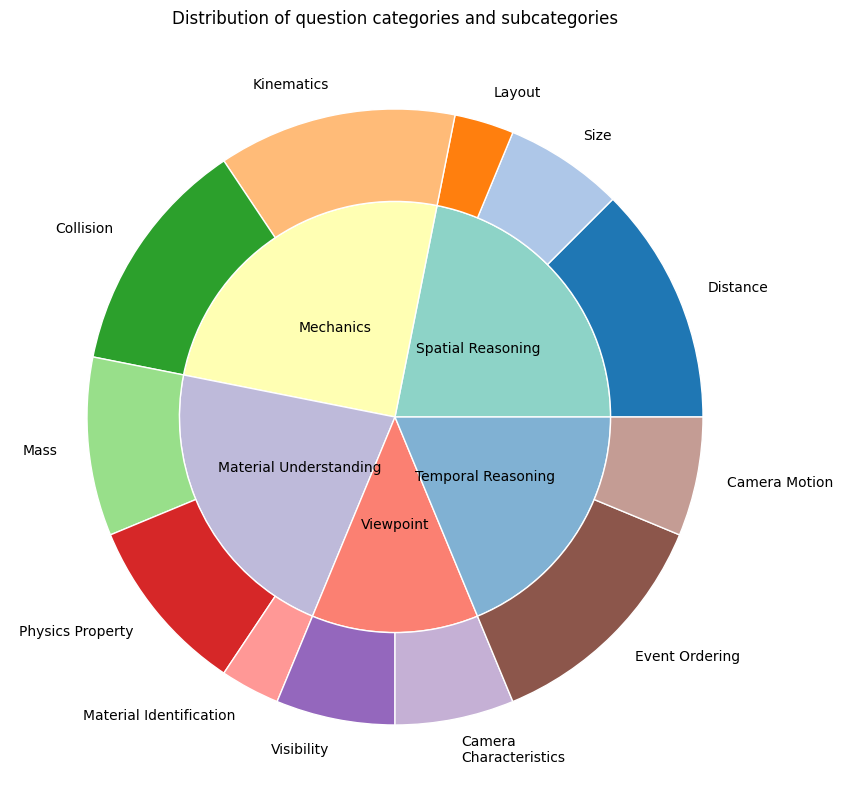

In [2]:
import json
import matplotlib.pyplot as plt
import math

# Load data from JSON file
with open("/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/simple_vqa.json", "r") as f:
    data = json.load(f)

# Prepare category and subcategory counts
outer_labels, outer_sizes = [], []
inner_labels, inner_sizes = [], []

for main_cat, subdata in data.items():
    subcat_counts = {}
    for _, props in subdata.items():
        if isinstance(props, dict):
            subcat = props.get('sub_category')
            if subcat:
                subcat_counts[subcat] = subcat_counts.get(subcat, 0) + 1

    for subcat, count in subcat_counts.items():
        outer_labels.append(f"{mapping_sub[subcat]}")
        outer_sizes.append(count)

    total = sum(subcat_counts.values())
    print(main_cat)
    inner_labels.append(mapping_cat[main_cat])
    inner_sizes.append(total)

# Colors
outer_colors = plt.cm.tab20.colors[:len(outer_labels)]
inner_colors = plt.cm.Set3.colors[:len(inner_labels)]

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# Inner pie (full circle)
wedges, _ = ax.pie(
    inner_sizes,
    labels=None,  # labels added manually
    radius=0.7,
    colors=inner_colors,
    wedgeprops=dict(width=0.7, edgecolor='white')
)

# Add centered inner labels
for w, label in zip(wedges, inner_labels):
    ang = (w.theta2 + w.theta1) / 2
    x = 0.35 * math.cos(math.radians(ang))
    y = 0.35 * math.sin(math.radians(ang))
    ax.text(x, y, label, ha='center', va='center', fontsize=10)

# Outer pie
ax.pie(
    outer_sizes,
    labels=outer_labels,
    radius=1,
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

ax.set(aspect="equal", title="Distribution of question categories and subcategories")
plt.show()


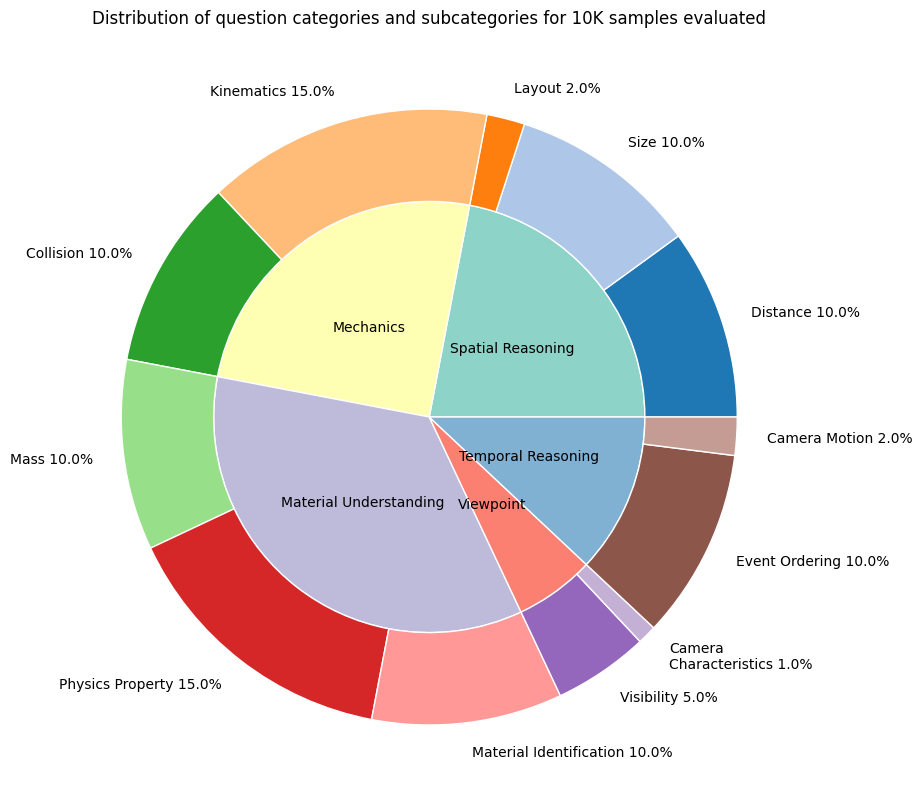

In [3]:
import json
import matplotlib.pyplot as plt
import math

# Load data from JSON file
with open("/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/answering_questions/balancing_sub_categories.json", "r") as f:
    balancing_subsample = json.load(f)

# Load data from JSON file
with open("/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/simple_vqa.json", "r") as f:
    data = json.load(f)


# Prepare category and subcategory counts
outer_labels, outer_sizes = [], []
inner_labels, inner_sizes = [], []

for main_cat, subdata in data.items():
    subcat_counts = {}
    for _, props in subdata.items():
        if isinstance(props, dict):
            subcat = props.get('sub_category')
            if subcat:
                subcat_counts[subcat] = balancing_subsample[subcat] 

    for subcat, count in subcat_counts.items():        
        outer_labels.append(f"{mapping_sub[subcat]} {balancing_subsample[subcat]*100:.1f}%")
        outer_sizes.append(balancing_subsample[subcat])

    total = sum(subcat_counts.values())
    inner_labels.append(mapping_cat[main_cat])
    inner_sizes.append(total)

# Colors
outer_colors = plt.cm.tab20.colors[:len(outer_labels)]
inner_colors = plt.cm.Set3.colors[:len(inner_labels)]

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# Inner pie (full circle)
wedges, _ = ax.pie(
    inner_sizes,
    labels=None,  # labels added manually
    radius=0.7,
    colors=inner_colors,
    wedgeprops=dict(width=0.7, edgecolor='white')
)

# Add centered inner labels
for w, label in zip(wedges, inner_labels):
    ang = (w.theta2 + w.theta1) / 2
    x = 0.35 * math.cos(math.radians(ang))
    y = 0.35 * math.sin(math.radians(ang))
    ax.text(x, y, label, ha='center', va='center', fontsize=10)

# Outer pie
ax.pie(
    outer_sizes,
    labels=outer_labels,
    radius=1,
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

ax.set(aspect="equal", title="Distribution of question categories and subcategories for 10K samples evaluated")
plt.show()


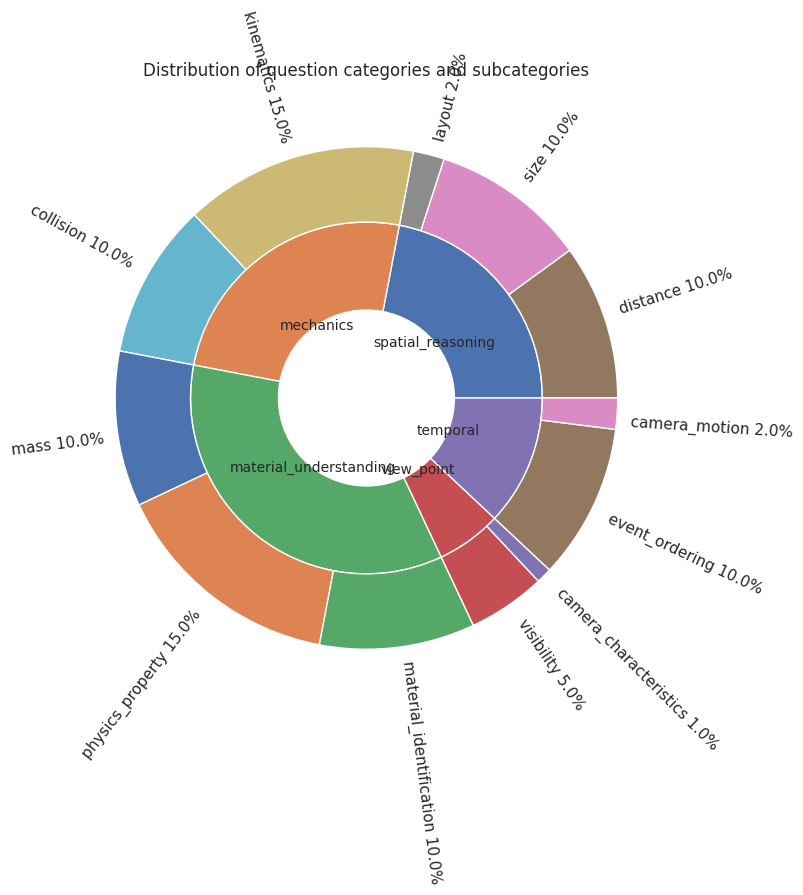

In [5]:
import json, math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()


# Paths
PATH_BAL_SUB = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/answering_questions/balancing_sub_categories.json"
PATH_DATA    = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/simple_vqa.json"

# Optional label maps; leave empty if you don't have them
mapping_cat, mapping_sub = {}, {}

with open(PATH_BAL_SUB) as f:
    balancing = json.load(f)  # {sub_category: fraction}
with open(PATH_DATA) as f:
    data = json.load(f)       # {main_cat: {id: {"sub_category": ...}, ...}}

outer_labels, outer_sizes = [], []
inner_labels, inner_sizes = [], []

for main_cat, subitems in data.items():
    seen = set()
    for _, props in subitems.items():
        if isinstance(props, dict):
            sc = props.get("sub_category")
            if sc and sc not in seen and sc in balancing:
                seen.add(sc)
                outer_labels.append(f"{mapping_sub.get(sc, sc)} {balancing[sc]*100:.1f}%")
                outer_sizes.append(balancing[sc])
    total = sum(balancing[sc] for sc in seen)
    if total > 0:
        inner_labels.append(mapping_cat.get(main_cat, main_cat))
        inner_sizes.append(total)

fig, ax = plt.subplots(figsize=(9, 9))

# Inner ring (categories)
wedges, _ = ax.pie(
    inner_sizes,
    labels=None,
    radius=0.7,
    wedgeprops=dict(width=0.35, edgecolor="white")
)

# Centered labels for inner ring
for w, lbl in zip(wedges, inner_labels):
    ang = (w.theta1 + w.theta2) / 2
    x, y = 0.35 * math.cos(math.radians(ang)), 0.35 * math.sin(math.radians(ang))
    ax.text(x, y, lbl, ha="center", va="center", fontsize=10)

# Outer ring (subcategories)
ax.pie(
    outer_sizes,
    labels=outer_labels,
    radius=1.0,
    labeldistance=1.05,
    rotatelabels=True,
    wedgeprops=dict(width=0.30, edgecolor="white")
)

ax.set(aspect="equal", title="Distribution of question categories and subcategories")
plt.tight_layout()
# plt.savefig("dist.png", dpi=200, bbox_inches="tight")
plt.show()


In [6]:
import plotly.graph_objects as go

# Example data
labels = ["Fruits", "Vegetables", "Citrus", "Berries", "Root", "Leafy"]
parents = ["", "", "Fruits", "Fruits", "Vegetables", "Vegetables"]
values = [10, 14, 6, 4, 8, 6]

# Create nested sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    insidetextorientation='radial'  # makes text perpendicular to the radius
))

fig.update_layout(
    margin=dict(t=40, l=0, r=0, b=0),
    title="Nested Pie (Sunburst) with Radial Labels"
)

fig.show()


In [15]:
import json
import plotly.graph_objects as go

# Paths
PATH_BAL_SUB = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/answering_questions/balancing_sub_categories.json"
PATH_DATA    = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/simple_vqa.json"

# Optional label maps; leave empty if you don't have them
mapping_cat, mapping_sub = {}, {}

with open(PATH_BAL_SUB) as f:
    balancing = json.load(f)  # {sub_category: fraction}
with open(PATH_DATA) as f:
    data = json.load(f)       # {main_cat: {id: {"sub_category": ...}, ...}}

# Build hierarchy: root -> main_cat -> sub_category
labels   = ["Total Questions"]
parents  = [""]
values   = [0.0]  # we'll overwrite with total

main_totals = {}
subs_for_main = {}

for main_cat, items in data.items():
    seen = set()
    for _, props in items.items():
        if not isinstance(props, dict):
            continue
        sc = props.get("sub_category")
        if sc and sc in balancing:
            seen.add(sc)

    if not seen:
        continue

    # Sum the balancing fractions for this main category
    total = sum(balancing[sc] for sc in seen)
    main_totals[main_cat] = total
    subs_for_main[main_cat] = sorted(seen)

# Add main categories
for main_cat, total in main_totals.items():
    labels.append(mapping_cat.get(main_cat, main_cat))
    parents.append("Total Questions")
    values.append(total)

# Add subcategories under each main category
for main_cat, sc_list in subs_for_main.items():
    parent_label = mapping_cat.get(main_cat, main_cat)
    for sc in sc_list:
        labels.append(mapping_sub.get(sc, sc))
        parents.append(parent_label)
        values.append(balancing[sc])

# Set root value to sum of mains
values[0] = sum(main_totals.values())

fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    insidetextorientation="radial",  # words perpendicular to the radius
    hovertemplate="<b>%{label}</b><br>Value: %{value:.3f}<extra></extra>"
))

fig.update_layout(
    title="Distribution of question categories and subcategories",
    margin=dict(t=40, l=0, r=0, b=0)
)

fig.show()


In [16]:
import json
import plotly.graph_objects as go

# Paths
PATH_BAL_SUB = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/answering_questions/balancing_sub_categories.json"
PATH_DATA    = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/simple_vqa.json"

# Your mappings
mapping_sub = {
    "visibility": "Visibility",
    "material_identification": "Material Identification",
    "size": "Size",
    "camera_characteristics": "Camera\nCharacteristics",
    "physics_property": "Physics Property",
    "kinematics": "Kinematics",
    "collision": "Collision",
    "mass": "Mass",
    "camera_motion": "Camera Motion",
    "layout": "Layout",
    "distance": "Distance",
    "event_ordering": "Event Ordering"
}

mapping_cat = {
    "mechanics": "Mechanics",
    "spatial_reasoning": "Spatial Reasoning",
    "visual_percetion": "Visual Perception",
    "temporal": "Temporal Reasoning",
    "view_point": "Viewpoint",
    "material_understanding": "Material Understanding"
}

with open(PATH_BAL_SUB) as f:
    balancing = json.load(f)  # {sub_category: fraction}
with open(PATH_DATA) as f:
    data = json.load(f)       # {main_cat: {id: {"sub_category": ...}, ...}}

labels  = ["All"]
parents = [""]
values  = [0.0]

main_totals = {}
subs_for_main = {}

for main_cat, items in data.items():
    seen = set()
    for _, props in items.items():
        if isinstance(props, dict):
            sc = props.get("sub_category")
            if sc and sc in balancing:
                seen.add(sc)
    if not seen:
        continue
    total = sum(balancing[sc] for sc in seen)
    if total <= 0:
        continue
    main_totals[main_cat] = total
    subs_for_main[main_cat] = sorted(seen)

# add main categories
for main_cat, total in main_totals.items():
    labels.append(mapping_cat.get(main_cat, main_cat))
    parents.append("All")
    values.append(total)

# add subcategories under each main category
for main_cat, sc_list in subs_for_main.items():
    parent_label = mapping_cat.get(main_cat, main_cat)
    for sc in sc_list:
        labels.append(mapping_sub.get(sc, sc))
        parents.append(parent_label)
        values.append(balancing[sc])

values[0] = sum(main_totals.values())

fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    insidetextorientation="radial",
    hovertemplate="<b>%{label}</b><br>%{value:.2%}<extra></extra>"
))
fig.update_layout(
    title="Distribution of question categories and subcategories",
    margin=dict(t=40, l=0, r=0, b=0)
)
fig.show()


In [28]:
import json
import plotly.graph_objects as go

# Paths
PATH_BAL_SUB = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/answering_questions/balancing_sub_categories.json"
PATH_DATA    = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/simple_vqa.json"

# Label mappings
mapping_sub = {
    "visibility": "Visibility",
    "material_identification": "Material<br>Identification",
    "size": "Size",
    "camera_characteristics": "Camera<br>Characteristics",
    "physics_property": "Physics<br>Property",
    "kinematics": "Kinematics",
    "collision": "Collision",
    "mass": "Mass",
    "camera_motion": "Camera<br>Motion",
    "layout": "Layout",
    "distance": "Distance",
    "event_ordering": "Event<br>Ordering"
}

mapping_cat = {
    "mechanics": "Mechanics",
    "spatial_reasoning": "Spatial<br>Reasoning",
    "visual_percetion": "Visual<br>Perception",
    "temporal": "Temporal<br>Reasoning",
    "view_point": "Viewpoint",
    "material_understanding": "Material<br>Understanding"
}

with open(PATH_BAL_SUB) as f:
    balancing = json.load(f)
with open(PATH_DATA) as f:
    data = json.load(f)

labels, parents, values = ["All"], [""], [0.0]
main_totals, subs_for_main = {}, {}

for main_cat, items in data.items():
    seen = set()
    for _, props in items.items():
        if isinstance(props, dict):
            sc = props.get("sub_category")
            if sc and sc in balancing:
                seen.add(sc)
    if not seen:
        continue
    total = sum(balancing[sc] for sc in seen)
    if total <= 0:
        continue
    main_totals[main_cat] = total
    subs_for_main[main_cat] = sorted(seen)

# main categories
for main_cat, total in main_totals.items():
    labels.append(mapping_cat.get(main_cat, main_cat))
    parents.append("All")
    values.append(total)

# subcategories
for main_cat, sc_list in subs_for_main.items():
    parent_label = mapping_cat.get(main_cat, main_cat)
    for sc in sc_list:
        labels.append(mapping_sub.get(sc, sc))
        parents.append(parent_label)
        values.append(balancing[sc])

values[0] = sum(main_totals.values())

# build chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    insidetextorientation="radial",
    maxdepth=3,
    textfont=dict(size=16),        # larger font
    marker=dict(line=dict(color="white", width=2))  # thicker divisions
))

fig.update_layout(
    width=900,
    height=900,
    margin=dict(t=80, l=40, r=40, b=40)
)
fig.update_traces(
    textfont=dict(size=18),
    marker=dict(line=dict(color="white", width=4))  # thicker boundaries
)

fig.show()


In [53]:
import json
import plotly.graph_objects as go

# Paths
PATH_BAL_SUB = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/answering_questions/balancing_sub_categories.json"
PATH_DATA    = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/simple_vqa.json"
PERCENT_MODE = "entry"   # change to "parent" if you prefer


# Label mappings
mapping_sub = {
    "visibility": "Visibility",
    "material_identification": "Material<br>Identification",
    "size": "Size",
    "camera_characteristics": "Camera<br>Characteristics",
    "physics_property": "Physics<br>Property",
    "kinematics": "Kinematics",
    "collision": "Collision",
    "mass": "Mass",
    "camera_motion": "Camera<br>Motion",
    "layout": "Layout",
    "distance": "Distance",
    "event_ordering": "Event<br>Ordering"
}

mapping_cat = {
    "mechanics": "Mechanics",
    "spatial_reasoning": "Spatial<br>Reasoning",
    "visual_percetion": "Visual<br>Perception",
    "temporal": "Temporal<br>Reasoning",
    "view_point": "Viewpoint",
    "material_understanding": "Material<br>Understanding"
}

with open(PATH_BAL_SUB) as f:
    balancing = json.load(f)
with open(PATH_DATA) as f:
    data = json.load(f)

labels, parents, values = ["Total number<br> of VQA<br><b>61196</b>"], [""], [0.0]
main_totals, subs_for_main = {}, {}

for main_cat, items in data.items():
    seen = set()
    for _, props in items.items():
        if isinstance(props, dict):
            sc = props.get("sub_category")
            if sc and sc in balancing:
                seen.add(sc)
    if not seen:
        continue
    total = sum(balancing[sc] for sc in seen)
    if total <= 0:
        continue
    main_totals[main_cat] = total
    subs_for_main[main_cat] = sorted(seen)

# main categories
for main_cat, total in main_totals.items():
    labels.append(mapping_cat.get(main_cat, main_cat))
    parents.append("Total number<br> of VQA<br><b>61196</b>")
    values.append(total)

# subcategories
for main_cat, sc_list in subs_for_main.items():
    parent_label = mapping_cat.get(main_cat, main_cat)
    for sc in sc_list:
        labels.append(mapping_sub.get(sc, sc))
        parents.append(parent_label)
        values.append(balancing[sc])

values[0] = sum(main_totals.values())

# Choose tokens for text and hover based on percent mode
if PERCENT_MODE == "parent":
    percent_token = "%{percentParent:.1%}"
    textinfo_mode = "label+percent parent"
    hover_pct_lbl = "of parent"
else:
    percent_token = "%{percentEntry:.1%}"
    textinfo_mode = "label+percent entry"
    hover_pct_lbl = "of total"

# build figure
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    textinfo=textinfo_mode,                 # show labels and percentages inside    
    texttemplate=[
        "" if i == 0 else "%{label}<br>" + percent_token  # hide center label
        for i in range(len(labels))
    ],
    insidetextorientation="radial",
    textfont=dict(size=20),  # big readable font
    marker=dict(line=dict(color="white", width=4))
))

# # center text (annotation)
# fig.add_annotation(
#     text="Total number<br> of VQA<br><b>43056</b>",
#     showarrow=False,
#     font=dict(size=24),
#     x=0.5, y=0.5
# )

# layout
fig.update_layout(
    title=dict(
        text="Distribution of Question Categories<br>and Subcategories",
        font=dict(size=26)
    ),
    width=950,
    height=950,
    margin=dict(t=100, l=50, r=50, b=50)
)


fig.show()


In [179]:
import json
import plotly.graph_objects as go

PATH_BAL_SUB = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/answering_questions/balancing_sub_categories.json"
PATH_DATA    = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/simple_vqa.json"

CENTER_TEXT = "<b>61K VQA</b>"
PERCENT_MODE = "entry"  # or "parent"

# Label mappings
mapping_sub = {
    "visibility": "Visibility",
    "material_identification": "Material<br>Identification",
    "size": "Size",
    "camera_characteristics": "Camera<br>Characteristics",
    "physics_property": "Physics<br>Property",
    "kinematics": "Kinematics",
    "collision": "Collision",
    "mass": "Mass",
    "camera_motion": "Camera Motion",
    "layout": "Layout",
    "distance": "Distance",
    "event_ordering": "Event<br>Ordering"
}

mapping_cat = {
    "mechanics": "Mechanics",
    "spatial_reasoning": "Spatial<br>Reasoning",
    "visual_percetion": "Visual<br>Perception",
    "temporal": "Temporal<br>Reasoning",
    "view_point": "Viewpoint",
    "material_understanding": "Material<br>Understanding"
}

with open(PATH_BAL_SUB) as f:
    balancing = json.load(f)
with open(PATH_DATA) as f:
    data = json.load(f)

root_label = CENTER_TEXT
labels, parents, values = [root_label], [""], [0.0]
main_totals, subs_for_main = {}, {}

for main_cat, items in data.items():
    seen = set()
    for _, props in items.items():
        if isinstance(props, dict):
            sc = props.get("sub_category")
            if sc and sc in balancing:
                seen.add(sc)
    if not seen:
        continue
    total = sum(balancing[sc] for sc in seen)
    if total > 0:
        main_totals[main_cat] = total
        subs_for_main[main_cat] = sorted(seen)

for main_cat, total in main_totals.items():
    labels.append(mapping_cat.get(main_cat, main_cat))
    parents.append(root_label)
    values.append(total)

for main_cat, sc_list in subs_for_main.items():
    parent_label = mapping_cat.get(main_cat, main_cat)
    for sc in sc_list:
        labels.append(mapping_sub.get(sc, sc))
        parents.append(parent_label)
        values.append(balancing[sc])

values[0] = sum(main_totals.values())

if PERCENT_MODE == "parent":
    percent_token = "%{percentParent:.1%}"
    hover_label = "of parent"
else:
    percent_token = "%{percentEntry:.1%}"
    hover_label = "of total"

# labels[4] = "asdasd"

# Build the figure
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    insidetextorientation="radial",
    textinfo="label+percent entry",
    texttemplate=[
        "" if i == 0 else "%{label}<br>" + percent_token  # hide center label
        for i in range(len(labels))
    ],
    textfont=dict(size=25),
    marker=dict(line=dict(color="white", width=4)),        
))

# Optional annotation in the center
if CENTER_TEXT:
    fig.add_annotation(
        text=f"{CENTER_TEXT}",
        showarrow=False,
        font=dict(size=26),
        x=0.5, y=0.5
    )

fig.update_layout(
    # title=dict(
    #     text="Distribution of Question Categories<br>and Subcategories",
    #     font=dict(size=26)
    # ),
    uniformtext=dict(minsize=22, mode="hide"),
    width=1150,
    height=950,
    margin=dict(t=50, l=50, r=50, b=50)
)

fig.update_traces(
    hovertemplate="<b>%{label}</b><br>"
                  "Value: %{value:.4f}<br>"
                  f"Percent {hover_label}: " + percent_token +
                  "<extra></extra>"
)


# fixing what I didn't like before
fig.add_annotation(
    text="Material<br>Understanding<br>35%",  # your custom label
    x=0.6, y=0.75,                    # position (normalized 0–1)
    showarrow=False,
    font=dict(size=23, color="white", family="Arial"),
    textangle=0                      # rotation in degrees
)

fig.add_annotation(
    text="Layout 2%",  # your custom label
    x=0.75, y=0.0,                    # position (normalized 0–1)
    showarrow=False,
    font=dict(size=22, color="#444444", family="Arial"),
    textangle=0                      # rotation in degrees
)

fig.add_annotation(
    text="Camera<br>Motion<br>2%",  # your custom label
    x=0.95, y=0.2,                    # position (normalized 0–1)
    showarrow=False,
    font=dict(size=22, color="#444444", family="Arial"),
    textangle=0                      # rotation in degrees
)

fig.add_annotation(
    text="Camera<br>Characteristics<br>1%",  # your custom label
    x=1.03, y=0.486,                    # position (normalized 0–1)
    showarrow=False,
    font=dict(size=22, color="#444444", family="Arial"),
    textangle=0                      # rotation in degrees
)

fig.show()


In [132]:
import json
import plotly.graph_objects as go

PATH_BAL_SUB = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/answering_questions/balancing_sub_categories.json"
PATH_DATA    = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/simple_vqa.json"

CENTER_TEXT = "Total number<br> of VQA<br><b>61K</b>"
PERCENT_MODE = "entry"  # or "parent"

# Label mappings
mapping_sub = {
    "visibility": "Visibility",
    "material_identification": "Material<br>Identification",
    "size": "Size",
    "camera_characteristics": "Camera<br>Characteristics",
    "physics_property": "Physics<br>Property",
    "kinematics": "Kinematics",
    "collision": "Collision",
    "mass": "Mass",
    "camera_motion": "Camera Motion",
    "layout": "Layout",
    "distance": "Distance",
    "event_ordering": "Event<br>Ordering"
}

mapping_cat = {
    "mechanics": "Mechanics",
    "spatial_reasoning": "Spatial<br>Reasoning",
    "visual_percetion": "Visual<br>Perception",
    "temporal": "Temporal<br>Reasoning",
    "view_point": "Viewpoint",
    "material_understanding": "Material<br>Understanding"
}

with open(PATH_BAL_SUB) as f:
    balancing = json.load(f)
with open(PATH_DATA) as f:
    data = json.load(f)

root_label = CENTER_TEXT
labels, parents, values = [root_label], [""], [0.0]
main_totals, subs_for_main = {}, {}

for main_cat, items in data.items():
    seen = set()
    for _, props in items.items():
        if isinstance(props, dict):
            sc = props.get("sub_category")
            if sc and sc in balancing:
                seen.add(sc)
    if not seen:
        continue
    total = sum(balancing[sc] for sc in seen)
    if total > 0:
        main_totals[main_cat] = total
        subs_for_main[main_cat] = sorted(seen)

for main_cat, total in main_totals.items():
    labels.append(mapping_cat.get(main_cat, main_cat))
    parents.append(root_label)
    values.append(total)

for main_cat, sc_list in subs_for_main.items():
    parent_label = mapping_cat.get(main_cat, main_cat)
    for sc in sc_list:
        labels.append(mapping_sub.get(sc, sc))
        parents.append(parent_label)
        values.append(balancing[sc])

values[0] = sum(main_totals.values())

if PERCENT_MODE == "parent":
    percent_token = "%{percentParent:.1%}"
    hover_label = "of parent"
else:
    percent_token = "%{percentEntry:.1%}"
    hover_label = "of total"

# labels[4] = "asdasd"

# Build the figure
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    insidetextorientation="radial",
    textinfo="label+percent entry",
    texttemplate=[
        "" if i == 0 else "%{label}<br>" + percent_token  # hide center label
        for i in range(len(labels))
    ],
    textfont=dict(size=25),
    marker=dict(line=dict(color="white", width=4)),        
))

# Optional annotation in the center
if CENTER_TEXT:
    fig.add_annotation(
        text=f"{CENTER_TEXT}",
        showarrow=False,
        font=dict(size=26),
        x=0.5, y=0.5
    )

fig.update_layout(
    title=dict(
        text="Distribution of Question Categories<br>and Subcategories",
        font=dict(size=26)
    ),
    uniformtext=dict(minsize=22, mode="show"),
    width=950,
    height=950,
    margin=dict(t=100, l=50, r=50, b=50)
)

fig.update_traces(
    hovertemplate="<b>%{label}</b><br>"
                  "Value: %{value:.4f}<br>"
                  f"Percent {hover_label}: " + percent_token +
                  "<extra></extra>"
)



fig.show()
